## EEG Wavelet Filters

<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">
Necessary libraries
</div>

In [10]:
import mne
import matplotlib.pyplot as plt 
from scipy.signal import detrend
import os
import pandas as pd  
import pywt
import numpy as np

"""
# Install the `mne` library, which is useful for processing and analyzing neuroscience data
pip install mne

# Install the `matplotlib` library, which provides tools for creating graphs and visualizations
pip install matplotlib

# Install the `scipy` library, which offers functions and algorithms for scientific and technical computing
pip install scipy

# Install the `pandas` library, which is ideal for manipulating and analyzing data in tabular structures
pip install pandas

# Install the `pywavelets` library, which is ideal for filters wavelet 
pip install pywavelets
"""

'\n# Install the `mne` library, which is useful for processing and analyzing neuroscience data\npip install mne\n\n# Install the `matplotlib` library, which provides tools for creating graphs and visualizations\npip install matplotlib\n\n# Install the `scipy` library, which offers functions and algorithms for scientific and technical computing\npip install scipy\n\n# Install the `pandas` library, which is ideal for manipulating and analyzing data in tabular structures\npip install pandas\n\n# Install the `pywavelets` library, which is ideal for filters wavelet \npip install pywavelets\n'

<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">
Wavelet Filters
</div>

Most studies focused on noise reduction in bioelectric signals such as ECG, EMG, EEG, among others, set fixed conditions for the implementation of wavelet filters.

<div style="text-align: left;">
<img src="assets\Signal_filtred.png">
</div>
<br>

<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">
The first thing is to load our EEG signal</div>

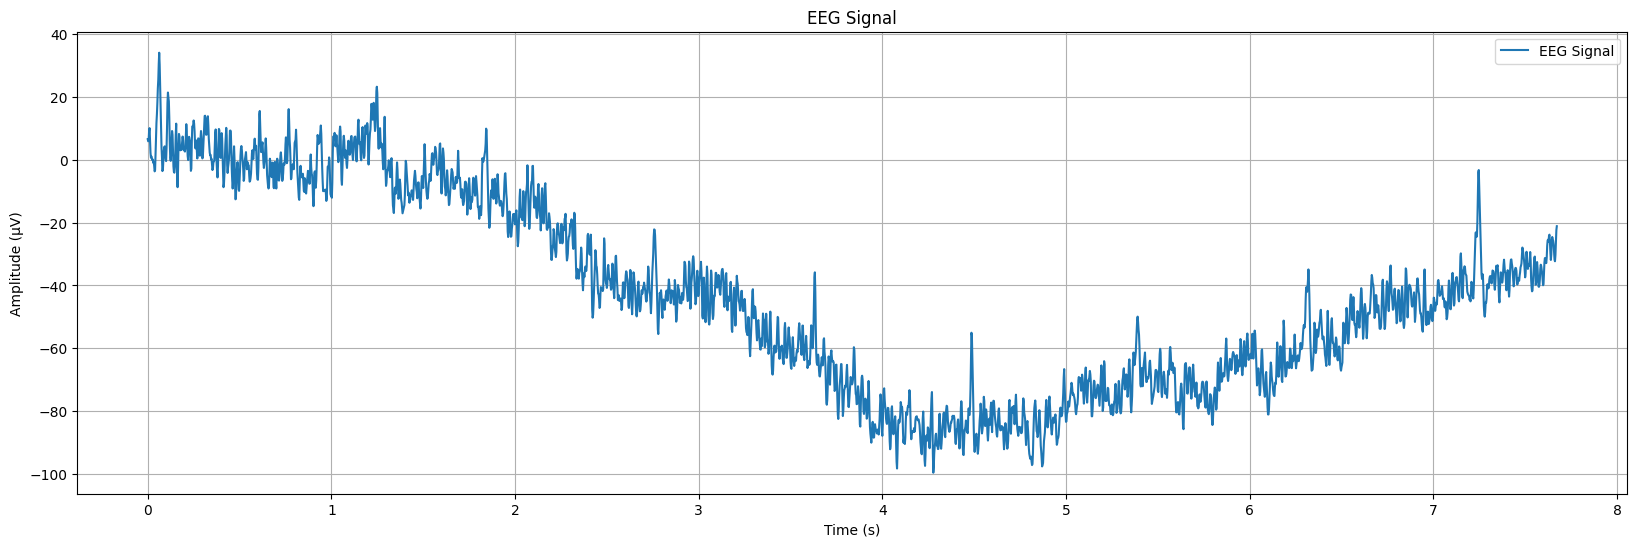

In [19]:
# Path to the CSV file
csv_file_path = 'database/eeg_signal_data.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Extract columns of interest and convert them to numpy arrays
times = np.array(df['Time (s)'])
data_volts = np.array(df['Amplitude (µV)'])

# Create the plot
plt.figure(figsize=(20, 6))                         # Set the figure size
plt.plot(times, data_volts, label='EEG Signal')     # Plot the EEG signal with a label
plt.xlabel('Time (s)')                              # Label for the x-axis
plt.ylabel('Amplitude (µV)')                        # Label for the y-axis
plt.title('EEG Signal')                             # Title of the plot
plt.legend()                                        # Display the legend
plt.grid(True)                                      # Add a grid for better readability

# Show the plot
plt.show()

<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">Compute the Power Spectral Density (PSD) using Welch's method</div>

 <span style="color: #b1c5fc;">psd = signal.welch(data_volts, fs=sampling_rate, nperseg=1024)</span> calculates the Power Spectral Density (PSD) of the signal data_volts using Welch's method. Welch's method divides the signal into overlapping segments, computes the periodogram for each segment, and averages these periodograms to provide a more accurate estimate of the PSD. The fs parameter specifies the sampling frequency of the signal, which is necessary for converting the time-domain data into frequency-domain information. The nperseg parameter defines the length of each segment used in the calculation. The function returns two arrays: frequencies, which represents the frequency bins, and psd, which represents the power of the signal at each frequency bin. This helps in analyzing how the power of the signal is distributed across different frequencies.

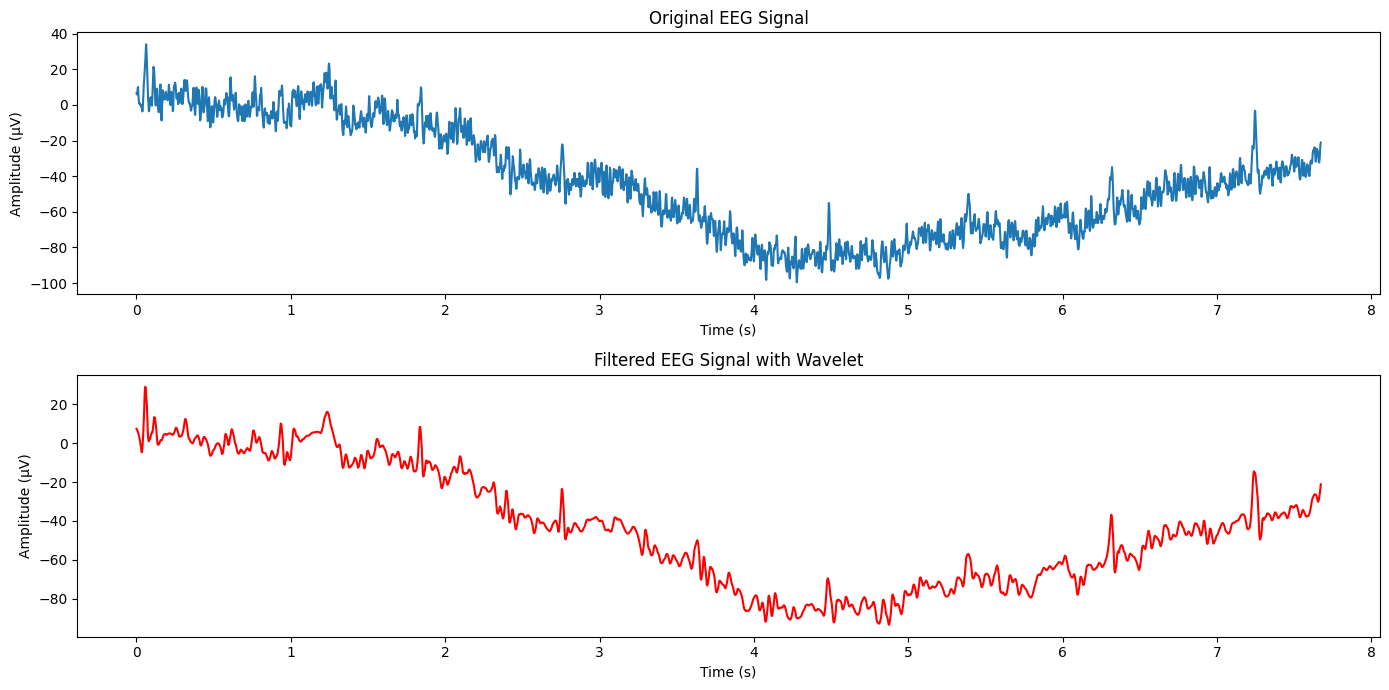

In [30]:
def wthresh(coeff, thr, s):
    """Thresholding function for wavelet coefficients."""
    y = []  
    for i in range(len(coeff)):  
        y.append(np.multiply(coeff[i], np.abs(coeff[i]) > (thr * s[i])))  
    return y 

def thselect(signal):
    """Select threshold value based on universal thresholding."""
    num_samples = 0  
    for i in range(len(signal)): 
        num_samples += signal[i].shape[0] 
    # Universal threshold
    thr = np.sqrt(2 * (np.log(num_samples)))  
    return thr  

def wnoisest(coeff):
    """Estimate noise standard deviation for each wavelet coefficient level."""
    stdc = np.zeros((len(coeff), 1))  
    for i in range(1, len(coeff)):  
        stdc[i] = (np.median(np.absolute(coeff[i])) / 0.6745)  
    return stdc  

# Path to the CSV file
csv_file_path = 'database/eeg_signal_data.csv'  

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)                                                     

# Extract columns of interest and convert them to numpy arrays
times = np.array(df['Time (s)'])                                                    # Extract time column and convert to numpy array
data_volts = np.array(df['Amplitude (µV)'])                                         # Extract amplitude column and convert to numpy array

# Apply Discrete Wavelet Transform (DWT)
wavelet = 'db4'                                                                     # Type of wavelet (Daubechies 4 in this case)
coeffs = pywt.wavedec(data_volts, wavelet, level=3)                                 # Perform DWT on the signal

stdc = wnoisest(coeffs)                                                             # Estimate the noise standard deviation for each wavelet level
threshold = thselect(coeffs)                                                        # Calculate the universal threshold for wavelet coefficients
coeffs_thresholded = wthresh(coeffs, threshold, stdc)                               # Apply thresholding to the wavelet coefficients
eeg_filtered = pywt.waverec(coeffs_thresholded, wavelet)                            # Reconstruct the signal from the thresholded coefficients

# Plot the original, noisy, and filtered signals
plt.figure(figsize=(14, 7)) 

plt.subplot(2, 1, 1)  
plt.plot(times, data_volts)  
plt.title('Original EEG Signal') 
plt.xlabel('Time (s)')  
plt.ylabel('Amplitude (µV)')  

plt.subplot(2, 1, 2)  
plt.plot(times, eeg_filtered, color='red')  
plt.title('Filtered EEG Signal with Wavelet')  
plt.xlabel('Time (s)')  
plt.ylabel('Amplitude (µV)')  

plt.tight_layout() 
plt.show() 


<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">wthresh</div>

The wthresh function performs thresholding on wavelet coefficients to reduce noise in a signal. It takes three parameters: the list of wavelet coefficients, a general threshold value, and a vector of standard deviations for each wavelet level. The function iterates through each level of the wavelet coefficients and applies a thresholding mask. Coefficients are set to zero if their absolute values are below the product of the threshold and the corresponding standard deviation, effectively filtering out small, potentially noisy coefficients.

This process ensures that only significant coefficients are retained, which helps in preserving the important features of the signal while eliminating noise. The result is a list of thresholded coefficients, where smaller, less significant coefficients are zeroed out. This is crucial for noise reduction in applications such as signal processing and data analysis.


In [27]:
def wthresh(coeff, thr, s):
    """Thresholding function for wavelet coefficients."""
    y = []
    for i in range(len(coeff)):
        y.append(np.multiply(coeff[i], np.abs(coeff[i]) > (thr * s[i])))
    return y

<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">thselect</div>

The thselect function calculates a universal threshold value used for wavelet coefficient thresholding. The function calculates the total number of samples in the signal by summing the number of samples across all wavelet levels. Using this total, it applies a formula to compute the universal threshold, which is derived from statistical noise models.

The universal threshold is determined using the formula sqrt(2 * log(num_samples)), where num_samples is the total number of samples in the signal. This threshold is designed to balance the trade-off between removing noise and preserving significant features of the signal. It provides a single, effective threshold value that can be applied to all levels of wavelet coefficients.


In [28]:
def thselect(signal):
    """Select threshold value based on universal thresholding."""
    num_samples = 0
    for i in range(len(signal)):
        num_samples += signal[i].shape[0]
    # Universal threshold
    thr = np.sqrt(2 * (np.log(num_samples)))
    return thr


<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">wnoisest</div>

The wnoisest function estimates the noise standard deviation for each level of wavelet coefficients. This is important for adaptive thresholding, where the threshold can be adjusted based on the estimated noise level. The function calculates the standard deviation of noise by using the median of the absolute values of the coefficients, divided by a factor of 0.6745.

The median absolute deviation is used as a robust measure of spread, providing a good estimate of noise level while being less sensitive to outliers. The resulting standard deviations for each level are stored in a vector and used in conjunction with a global threshold to perform effective wavelet coefficient thresholding.

In [29]:
def wnoisest(coeff):
    """Estimate noise standard deviation for each wavelet coefficient level."""
    stdc = np.zeros((len(coeff), 1))
    for i in range(1, len(coeff)):
        stdc[i] = (np.median(np.absolute(coeff[i])) / 0.6745)
    return stdc


<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">Types of Wavelet's filters</div>

En this code, you can specify a list of different wavelet types, and the code will process the signal using each one. Graphs will be generated for each wavelet type, showing both the original signal and the filtered signal.

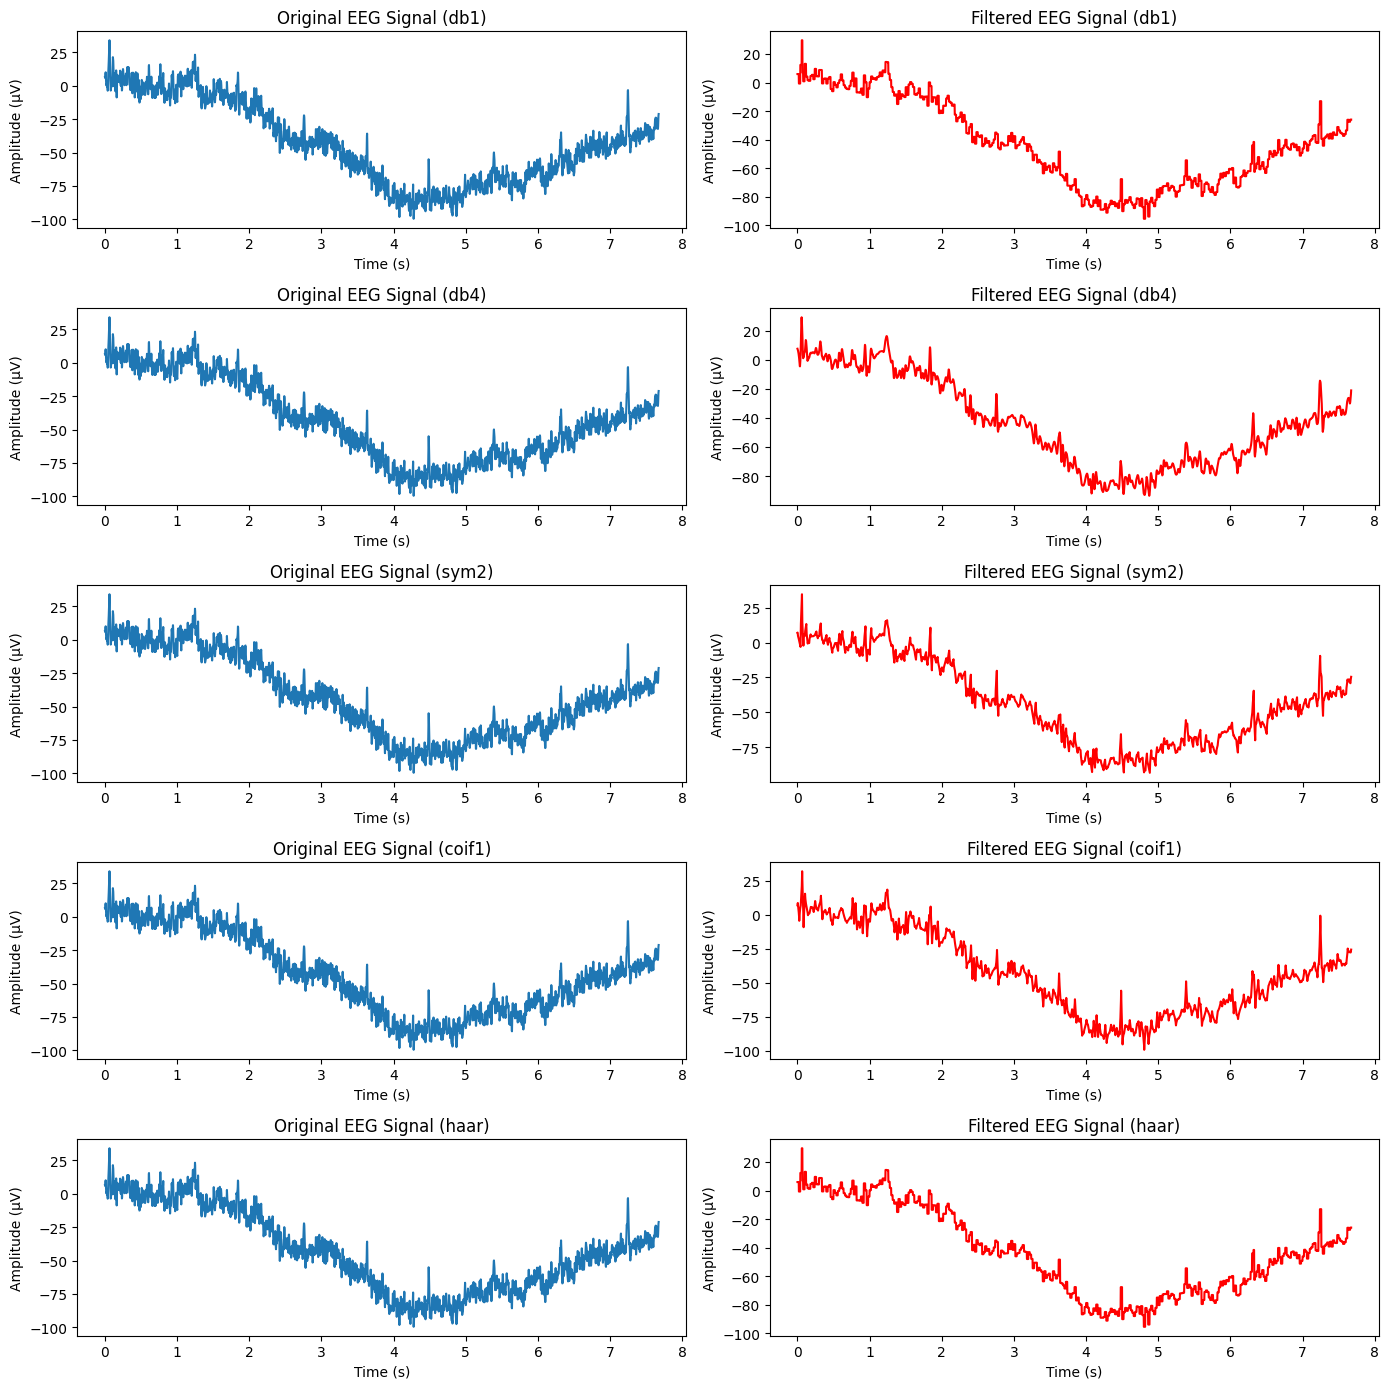

In [31]:
wavelet_types = ['db1', 'db4', 'sym2', 'coif1', 'haar']

# Create a plot for each wavelet type
plt.figure(figsize=(14, 14))  # Set the figure size for plotting

for i, wavelet in enumerate(wavelet_types):
    # Apply Discrete Wavelet Transform (DWT)
    coeffs = pywt.wavedec(data_volts, wavelet, level=3)
    stdc = wnoisest(coeffs)
    threshold = thselect(coeffs)
    coeffs_thresholded = wthresh(coeffs, threshold, stdc)
    
    # Reconstruct the signal from the thresholded coefficients
    eeg_filtered = pywt.waverec(coeffs_thresholded, wavelet)
    
    # Plot the original and filtered signals for the current wavelet type
    plt.subplot(len(wavelet_types), 2, 2 * i + 1)  # Create subplot for the original signal
    plt.plot(times, data_volts)
    plt.title(f'Original EEG Signal ({wavelet})')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (µV)')
    
    plt.subplot(len(wavelet_types), 2, 2 * i + 2)  # Create subplot for the filtered signal
    plt.plot(times, eeg_filtered, color='red')
    plt.title(f'Filtered EEG Signal ({wavelet})')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (µV)')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()  # Display the plot

<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">Decomposition levels</div>

The number of decomposition levels in wavelet analysis is crucial as it affects the resolution and detail of the signal analysis. Lower levels capture high-frequency details, while higher levels focus on low-frequency components, allowing for different aspects of the signal to be examined. More levels can enhance noise reduction by providing a more detailed view, but this also increases computational complexity and processing time. Thus, the choice of decomposition levels must balance the need for detail and effective noise reduction with the available computational resources.

The code iterates through different decomposition levels, applies thresholding to the wavelet coefficients to reduce noise, and reconstructs the filtered signal. It then generates plots to visually compare the original and filtered signals for each level of decomposition. This approach helps in understanding how the choice of decomposition level affects the noise reduction and signal reconstruction.

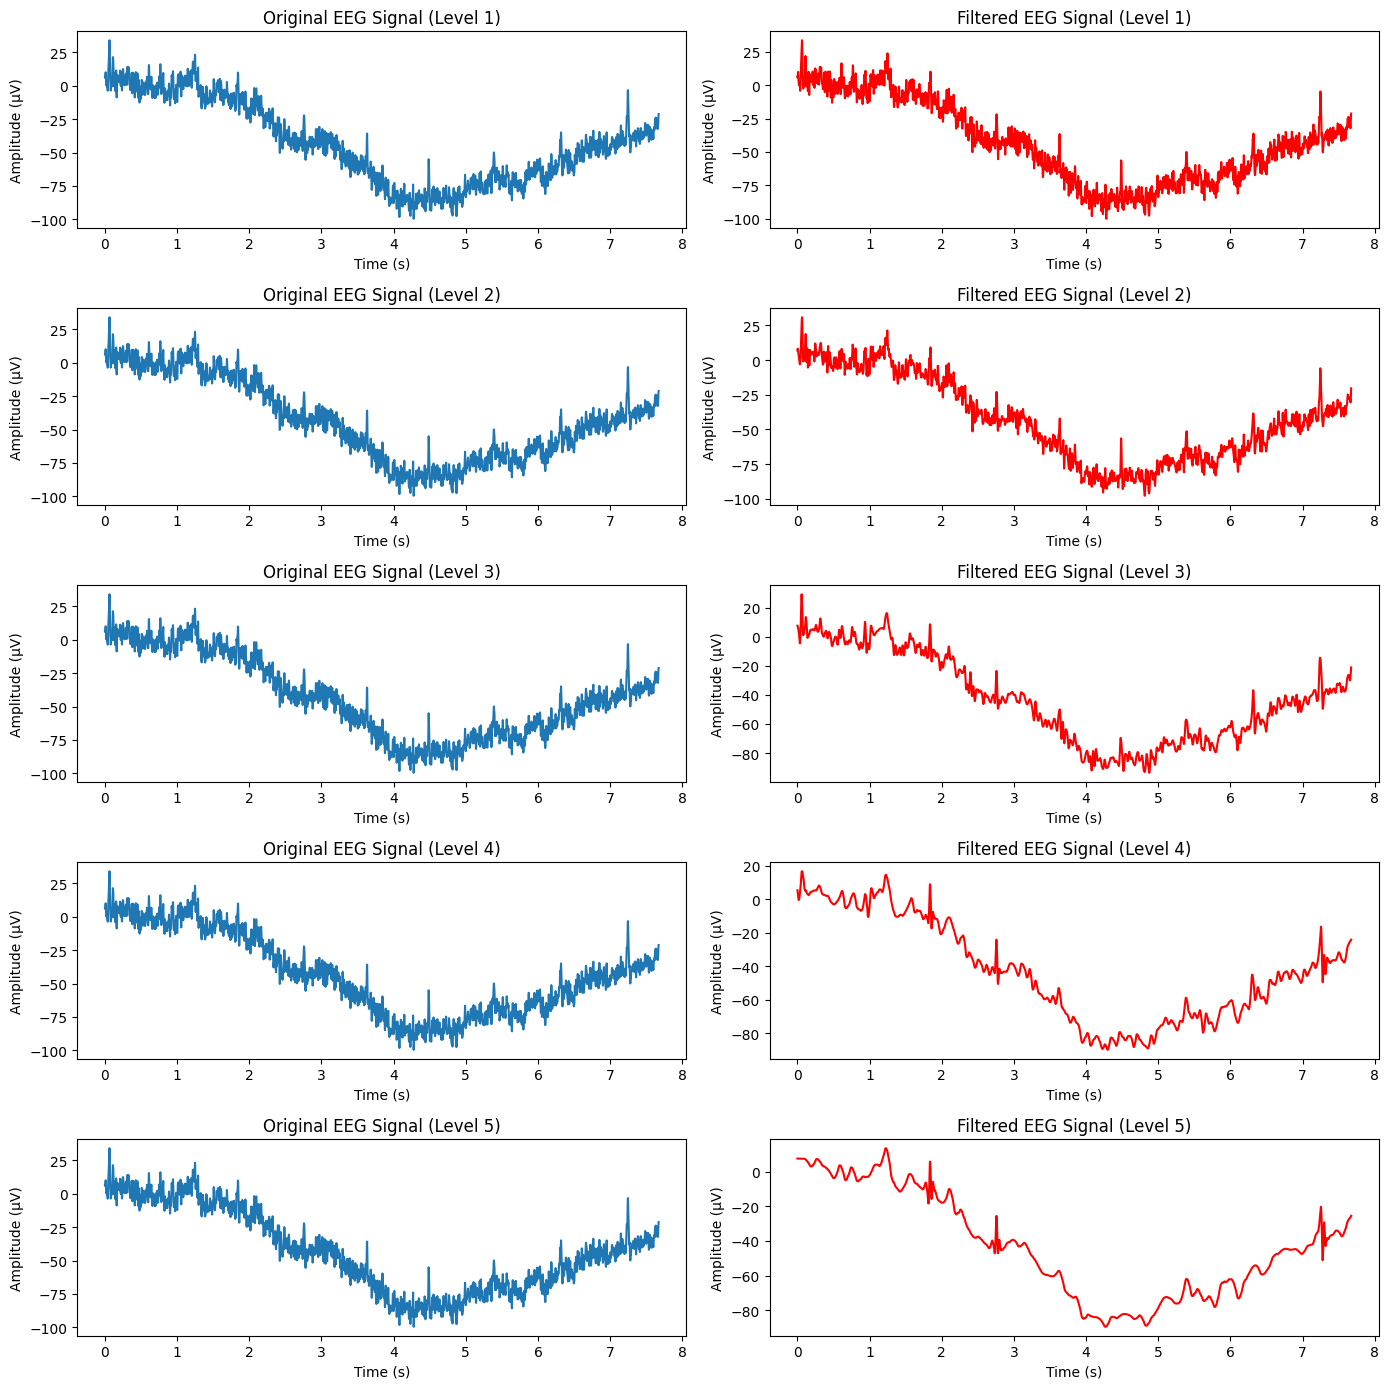

In [34]:
wavelet = 'db4'
levels = [1, 2, 3, 4, 5]

# Create plots for each level
plt.figure(figsize=(14, 14))  # Set the figure size for plotting

for j, level in enumerate(levels):
    
    # Apply Discrete Wavelet Transform (DWT)
    coeffs = pywt.wavedec(data_volts, wavelet, level=level)
    stdc = wnoisest(coeffs)
    threshold = thselect(coeffs)
    coeffs_thresholded = wthresh(coeffs, threshold, stdc)
    
    # Reconstruct the signal from the thresholded coefficients
    eeg_filtered = pywt.waverec(coeffs_thresholded, wavelet)
    
    # Plot the original and filtered signals for the current level
    plt.subplot(len(levels), 2, 2 * j + 1)  # Create subplot for the original signal
    plt.plot(times, data_volts)
    plt.title(f'Original EEG Signal (Level {level})')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (µV)')
    
    plt.subplot(len(levels), 2, 2 * j + 2)  # Create subplot for the filtered signal
    plt.plot(times, eeg_filtered, color='red')
    plt.title(f'Filtered EEG Signal (Level {level})')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (µV)')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()  # Display the plot